In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tensorflow.keras.models import load_model

2024-07-08 13:00:50.282324: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 13:00:50.323076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 13:00:50.950380: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
import swallowing_recognition

In [3]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [4]:
# directory_path = parent_dir / '30min_data'
directory_path = parent_dir 

In [513]:
path = directory_path / 'experiment'/ 'experiment2'/'mocchi'/'5.wav'

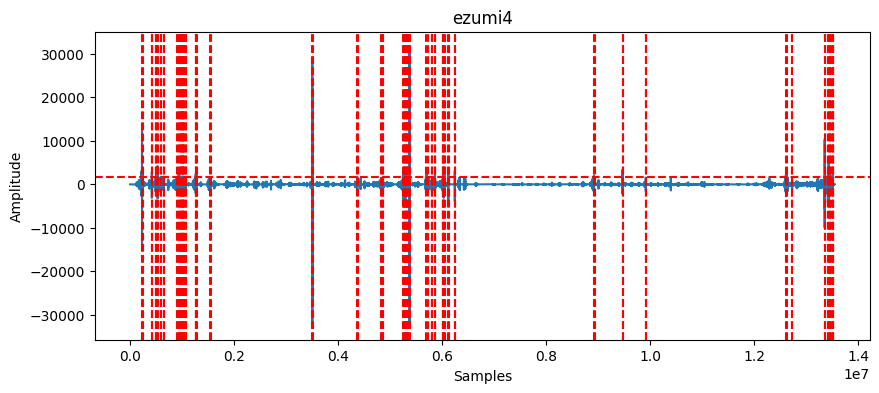

[221652, 419992, 492753, 524491, 588703, 644736, 908827, 937099, 971907, 1005086, 1018140, 1038793, 1077697, 1262752, 1278345, 1545337, 3502509, 4370086, 4830104, 4858948, 5255765, 5274788, 5295696, 5316986, 5329687, 5366897, 5691409, 5805885, 5865014, 6017051, 6026089, 6044648, 6121235, 6245548, 8917024, 9471849, 9918266, 12609506, 12731170, 13358170, 13416832, 13454521, 13478465, 13511638]
[251282, 428247, 508330, 539657, 597437, 652973, 921430, 966967, 982937, 1013308, 1026347, 1047081, 1085900, 1271544, 1287005, 1553554, 3516347, 4378292, 4838310, 4867153, 5267015, 5283029, 5303979, 5325239, 5345226, 5392478, 5728746, 5814088, 5873343, 6025254, 6039569, 6057867, 6129544, 6253903, 8932317, 9480140, 9926738, 12641030, 12739375, 13366568, 13444018, 13462889, 13508921, 13523059]


In [514]:
wav1 = long_audio.Long_audio(path, threshold = 0.05)
# ezumi 0.028
# soichiro 0.01
# haruki 0.02
# ibuki 0.02 (4だけ0.04)
# hikaru 0.02
# kazuki 0.02
# tsuji 0.02 (1だけ0.036)
# nakaryo 0.02
# kosasa 0.02 
# kishimoto 0.02 (2は0.064，4と5は0.05)
# kanata 0.05 (3と5は0.02)
# ruku 0.02
# shibata 0.02(3は0.04)
# mocchiは0.05 
# kimは0.02
# genkiは0.02
# kyogoku 1と3は0.05, 2は0.06 4は0.04, 5は0.03

wav1.plot("ezumi4")
print(wav1.start_idxs)
print(wav1.end_idxs)

In [515]:
current_path = directory_path
model_path = current_path / 'ipynb_swallowing' / '202400614_binary_ep40_bs32_all.keras'
wav1.predict(model_path, 2)

(44, 224, 224, 3)
2/2 [==============================] - 1s 25ms/step
Predicted classes: [0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0
 1 1 0 1 1 1 1]


In [516]:
print(len(wav1.swallowing_start_idxs))
start_array = wav1.swallowing_start_idxs/44100
end_array = wav1.swallowing_end_idxs/44100

16


In [517]:
start_list = list(start_array)
end_list = list(end_array)
print(start_list)
print(end_list)

[5.026122448979592, 9.523628117913832, 11.173537414965987, 11.893219954648526, 13.349274376417233, 21.249410430839003, 79.42197278911564, 119.6097052154195, 120.08380952380952, 120.85458049886621, 121.69834467120181, 129.05689342403628, 138.80351473922903, 214.78115646258505, 224.9039909297052, 302.9063492063492]
[5.698004535147392, 9.710816326530612, 11.526757369614513, 12.237120181405896, 13.547324263038549, 21.926689342403627, 79.73575963718821, 119.79657596371882, 120.27163265306122, 121.20693877551021, 122.2784126984127, 129.903537414966, 138.99192743764172, 214.96916099773242, 225.09609977324263, 303.09678004535147]


In [518]:
wav1.save_plots_to_pdf('mocchi5.pdf')

## ここまでは必ずやる
やっていることは  
import  
どのwavファイルを解析するか指定  
wavファイルをデータセットにしウェーブレット変換  
変換したものを学習  

In [32]:
sections = np.arange(0, 361, 120)
counts, _ = np.histogram(start_array, bins=sections)

print("Sections:", sections)
print("Counts in each section:", counts)
print(start_array)

Sections: [  0 120 240 360]
Counts in each section: [2 4 2]
[  6.17929705  21.29680272 149.59349206 151.81181406 183.65630385
 190.37732426 307.60938776 310.56385488]


In [ ]:
# 各セクションでの嚥下時間の合計と平均を計算するためのリスト
total_durations = []
mean_durations = []

# sections = np.arange(900, 1141, 120)
# sections = np.arange(960, 1201, 120)
# sections = np.arange(900, 1201, 300)

# セクションごとに処理
for i in range(len(sections) - 1):
    # セクション内での嚥下の開始と終了時間を抽出
    mask = (start_array >= sections[i]) & (start_array < sections[i + 1])    
    section_start_times = start_array[mask]
    section_end_times = end_array[mask]
    
    # 嚥下時間の計算
    swallow_durations = section_end_times - section_start_times
    
    # 嚥下時間の合計と平均の計算
    total_duration = np.sum(swallow_durations)
    mean_duration = np.mean(swallow_durations) if swallow_durations.size > 0 else 0  # 嚥下がない場合は平均を0とする
    
    # 結果をリストに追加
    total_durations.append(total_duration)
    mean_durations.append(mean_duration)
    
    # 結果の表示
    print(f"Section from {sections[i]} to {sections[i + 1]} seconds:")
    print(f"  Total swallowing duration: {total_duration} seconds")
    print(f"  Mean swallowing duration: {mean_duration:.2f} seconds\n")

In [ ]:
wav1.save_png_swallowing_number_line('shibata_1.png')
wav1.display_HTML('shibata_1.png')

### wavファイルの嚥下と識別された部分を図示

In [ ]:
# wav1.plot_predicted("lemon_washino_5min.wav")
wav1.plot_predicted("osawa_1")

### 嚥下回数を前後30秒の計60秒で何回しているか図示

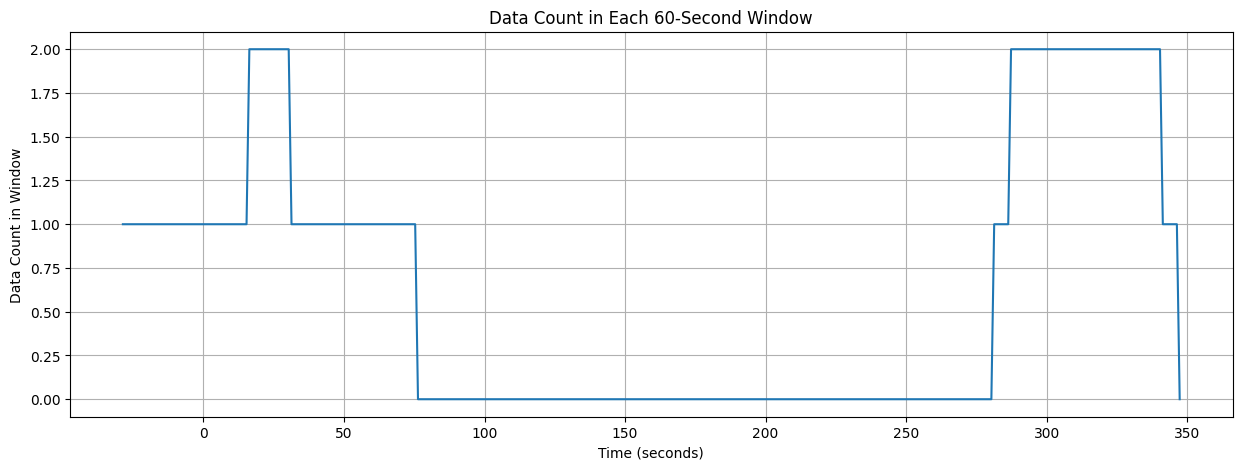

In [24]:
wav1.plot_swallowing_count(window_size = 30, interval = 1)

### 唾液推定に必要な数字を算出
wavファイル内の嚥下回数  
ある範囲の回数を認識
リスト形式でプリント
嚥下の時間を算出

In [15]:
time = end_array - start_array
print(list(time))
print((np.mean(time)))
print(np.sum(time))

[0.32442176870748307, 0.2780725623582754, 0.1917687074829928, 0.37492063492061334, 0.30181405895689295]
0.2941995464852515
1.4709977324262575


### wavファイルの波形と嚥下タイミングを描画